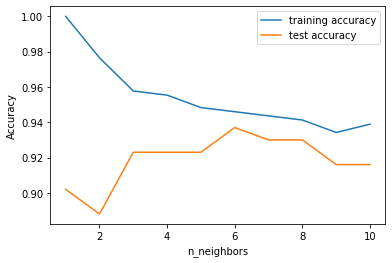

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

neighbor_settings = range(1,11)

for k in neighbor_settings:
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbor_settings, training_accuracy, label="training accuracy")
plt.plot(neighbor_settings, test_accuracy, label="test accuracy")
plt.xlabel("n_neighbors")    
plt.ylabel("Accuracy")
plt.legend()


In [3]:
from sklearn.model_selection import cross_val_score
cv_score = []

for k in neighbor_settings:
    clf = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
    cv_score.append(scores.mean())

MSE = [1 - x for x in cv_score]
optimal_k = neighbor_settings[MSE.index(min(MSE))]
print(optimal_k)


6


Text(0, 0.5, 'Missclassification Error')

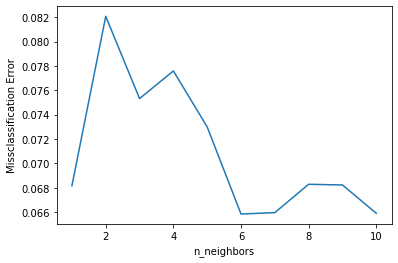

In [4]:
plt.plot(neighbor_settings, MSE)
plt.xlabel("n_neighbors")    
plt.ylabel("Missclassification Error")